# Graphs

This is a handy guidebook that shows various kinds of graph plotting possible on available sample data in Seaborn library.
I have Three aproach to show plotting using three approaches/libraries namely
- Pandas
- Matplotlib.Pyplot
- Seaborn

# Types of graphs
- Distribution Chart
- Trend
- Comparision or Relationship graphs
- Composition Chart

## Distribution Chart
Extent or spread or contents of one single variable e.g.
- population desnsity using histogram
- min max quadrants percentile etc
- bar/pie chart for counts
- Word count

## Trend Charts
Extent of a variable wrt to time or some cquantity that is increasing
- Distribution chart with a time line
- Run rate graphs

## Comparision Charts
Compares two values on a graphs
- bar ghaph
- dodged bar graph

## Composition Chart
Talks about the contents/constituents of a variable
- pie chart
- doughnut chart

In [3]:
# Loading dataset

In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
graph = pd.read_csv("Startups.csv")

In [7]:
graph.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
# loading tips dataset
tips = sns.load_dataset("tips")

In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Classification on basis of analysis
- Univariate
- Bivariate

## Univariate
### Continuous
- Count           
- Sum             
- Mean/Median/Mode
- Range
- Standard Deviation/ Variance

    #### Types of graphs used
    - Scatterplot
    - Lineplot
    - Boxplot
    - Hist

### categorical
- Count
- Count%

    #### Types of graphs used
    - bar
    - pie

## Bivariate Analysis

### con - con
- correlation
    #### Graphs
    - Scatterplot

### con - cat
- aggregation

    #### Graphs
    - bar/dodged bar/stacked bar
    - pie
    - line/area

### cat - cat
- cross-tab (chi Square)
    
    #### Graphs
    - bar and pie

## Box Plot

### 1) Using Pandas

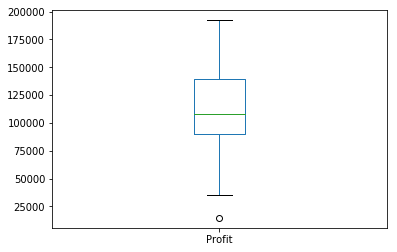

In [10]:
# 1 Using Pandas
# on column
graph.Profit.plot(kind="box")

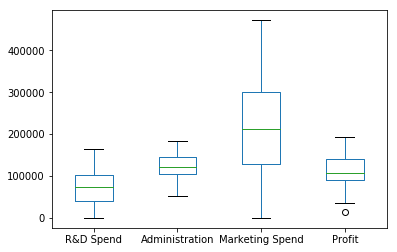

In [11]:
# on dataframe
graph.plot(kind="box")
#only continuousvariables are shown, categorical are removed

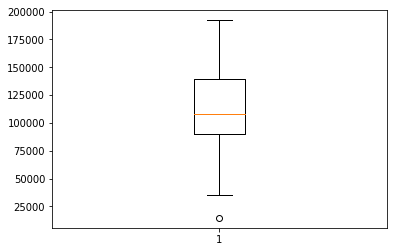

In [12]:
#2 Using pyplot
# on column
plt.boxplot(x=graph.Profit)
plt.show()
#doesnt work on dataframe

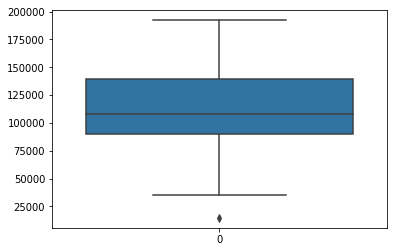

In [13]:
# using seaborn
sns.boxplot(data=graph.Profit)

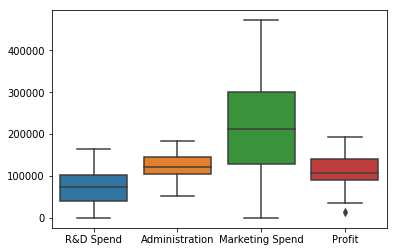

In [14]:
sns.boxplot(data=graph)
# Works well on dataframe

## Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000236D1043080>]],
      dtype=object)

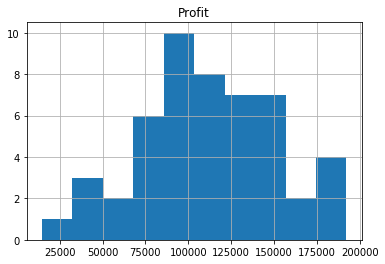

In [15]:
# using pandas
graph.hist(column="Profit")

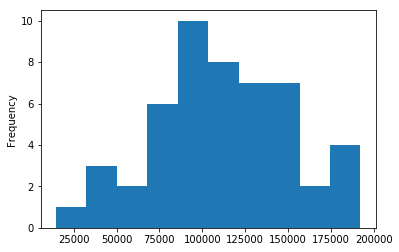

In [16]:
# other way
graph.Profit.plot(kind="Hist")

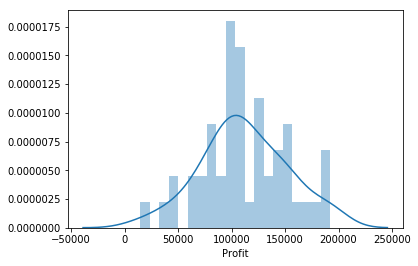

In [17]:
# Using Seaborn
sns.distplot(graph.Profit,bins=20)

## Scatter plot

In [18]:
# one variable Scatterplot
# on y Axis we have the variable
# on X Axis we have the indexes

In [19]:
X = pd.Series(np.arange(0,len(graph)))
len(X)

50

In [20]:
graph.shape

(50, 5)

In [21]:
# 1) no pandas function for scatter

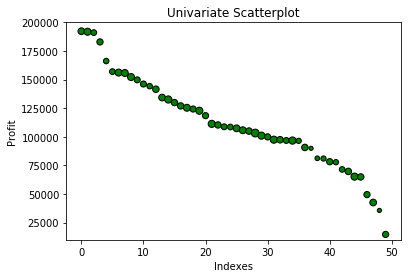

In [22]:
# 2) using pyplot
plt.scatter(x=X,y=graph.Profit,c="green",s=graph.Administration/3000,edgecolors="black")
plt.ylabel("Profit")
plt.xlabel("Indexes")
plt.title("Univariate Scatterplot")
plt.ylim(10000,200000)
plt.show()

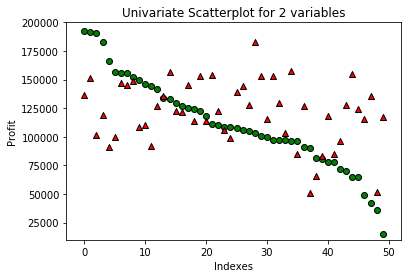

In [23]:
# add different variable on same plot
plt.scatter(x=X,y=graph.Profit,c="green",edgecolors="black")
plt.scatter(x=X,y=graph.Administration,c="Red",edgecolors="black",marker="^")
plt.ylabel("Profit")
plt.xlabel("Indexes")
plt.title("Univariate Scatterplot for 2 variables")
plt.ylim(10000,200000)
plt.show()

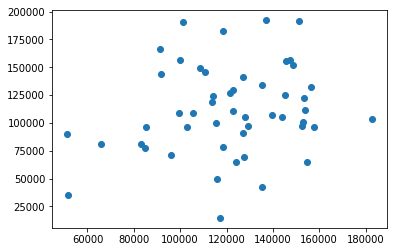

In [24]:
# Scatter plot for bivariate analysis
# Inplace of indexes use another variable
# It literally maps coordinates and shows correlation

plt.scatter(x=graph.Administration,y=graph.Profit)
plt.show()

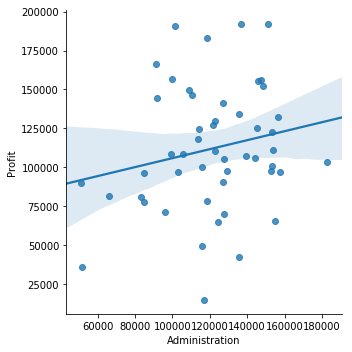

In [25]:
# 3) Scatter using Seaborn
#    Can add a categorical variable as "hue"
sns.lmplot(data=graph,x="Administration",y="Profit")

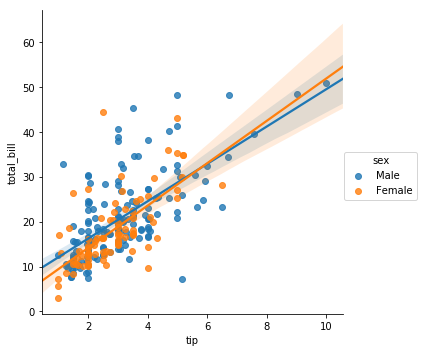

In [26]:
sns.lmplot(data=tips,x="tip",y="total_bill",hue="sex")

## Bar Plot

In [27]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [28]:
# Grouping data by "day"
gby = tips.groupby(by="day").sum().add_prefix("sum_")

In [29]:
# grouped data in agg dataframe
agg = gby[["sum_total_bill","sum_tip"]]
agg

,sum_total_bill,sum_tip
day,,
Thur,1096.33,171.83
Fri,325.88,51.96
Sat,1778.40,260.40
Sun,1627.16,247.39


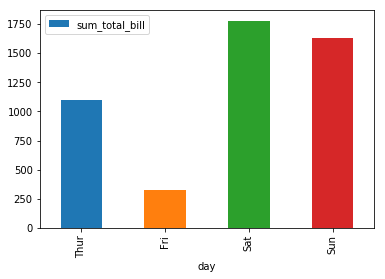

In [30]:
# 1) using pandas
#   single variable
agg.plot(kind="bar",y="sum_total_bill")

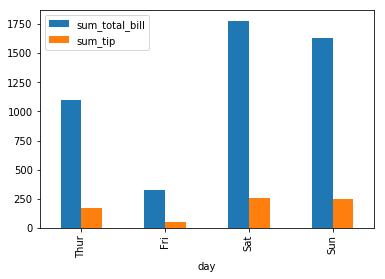

In [31]:
# multiple variables parrallel analysis
agg.plot(kind="bar")

In [32]:
# 2) Using pyplot
# First need to convert index into column

agg_plt = agg.reset_index()
agg_plt

,day,sum_total_bill,sum_tip
0,Thur,1096.33,171.83
1,Fri,325.88,51.96
2,Sat,1778.40,260.40
3,Sun,1627.16,247.39


<Container object of 4 artists>

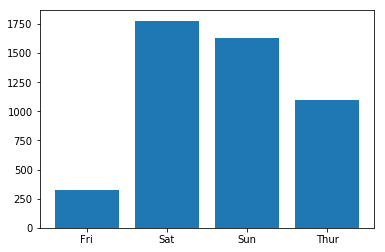

In [33]:
plt.bar(x=agg_plt.day,height=agg_plt.sum_total_bill)

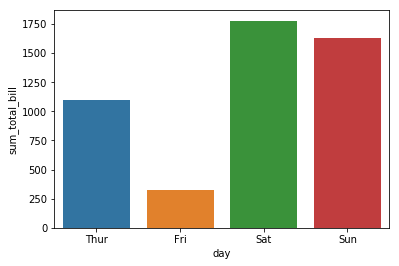

In [34]:
# 3) using Seaborn
sns.barplot(data=agg_plt,x="day",y="sum_total_bill")

In [35]:
# Group by "sex"
agg2 = tips.groupby("sex")["total_bill"].sum().add_prefix("sum_")

In [36]:
agg2

sex
sum_Male      3256.82
sum_Female    1570.95
Name: total_bill, dtype: float64

In [37]:
type(agg2)

pandas.core.series.Series

In [38]:
# if you dont include double brackets a Series will be formed
agg2.reset_index()

,sex,total_bill
0,sum_Male,3256.82
1,sum_Female,1570.95


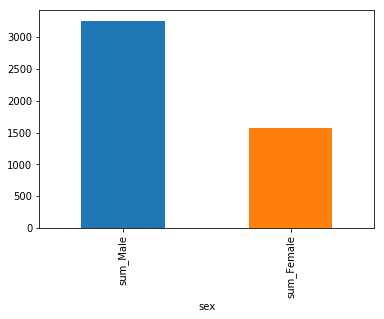

In [39]:
agg2.plot(kind = "bar")

In [40]:
agg2 = tips.groupby("sex")[["total_bill"]].sum().add_prefix("sum_")
agg2

,sum_total_bill
sex,
Male,3256.82
Female,1570.95


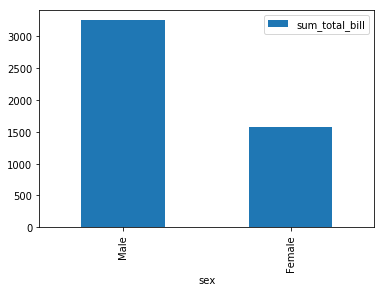

In [41]:
agg2.plot(kind = "bar")

In [42]:
agg2_plt = agg2.reset_index()
agg2_plt

,sex,sum_total_bill
0,Male,3256.82
1,Female,1570.95


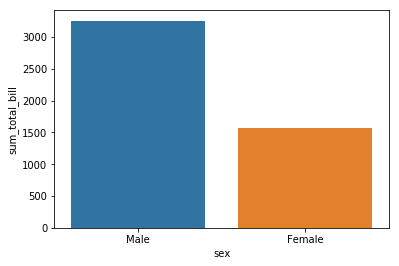

In [43]:
sns.barplot(data=agg2_plt,x="sex",y="sum_total_bill")

### Two variables one aggregation

In [44]:
# grouping by two variables
agg3 = tips.groupby(["sex","smoker"])[["total_bill"]].sum().add_prefix("sum_")
agg3

sum_total_bill
sex    smoker                
Male   Yes            1337.07
       No             1919.75
Female Yes             593.27
       No              977.68

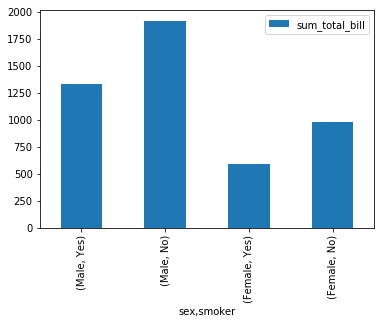

In [45]:
# 1) using pandas
agg3.plot(kind="bar")

In [46]:
agg3a = agg3.reset_index()
agg3a

,sex,smoker,sum_total_bill
0,Male,Yes,1337.07
1,Male,No,1919.75
2,Female,Yes,593.27
3,Female,No,977.68


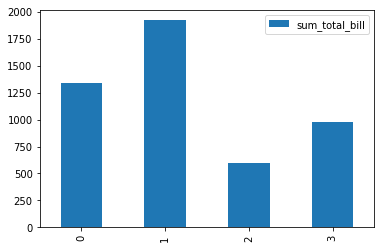

In [47]:
agg3a.plot(kind="bar")

In [48]:
agg3a_piv = agg3a.pivot(index="sex",columns="smoker",values="sum_total_bill")
agg3a_piv

smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


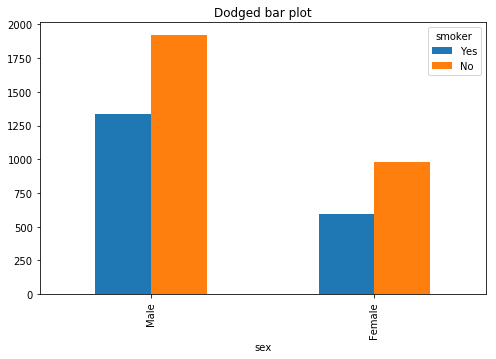

In [49]:
agg3a_piv.plot(kind="bar",figsize=(8,5))
plt.title("Dodged bar plot")
plt.show()

<Container object of 4 artists>

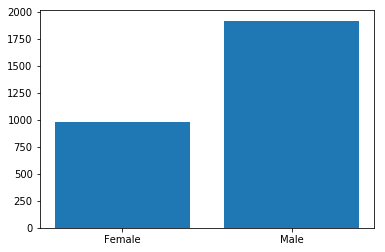

In [50]:
# 2) using pyplot

plt.bar(x=agg3a.sex,height=agg3a.sum_total_bill)

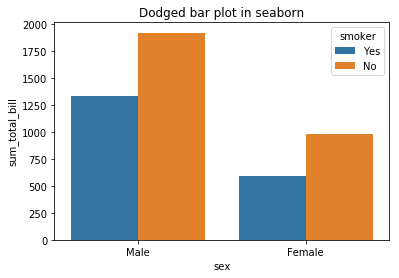

In [51]:
# 3) using Seaborn
# no pivot table required here
sns.barplot(data=agg3a,x="sex",y="sum_total_bill",hue="smoker")
plt.title("Dodged bar plot in seaborn")
plt.show()

### One variable two aggregations

In [52]:
a = tips.groupby("size")[["total_bill"]].mean().add_prefix("mean_")
b = tips.groupby("size")[["total_bill"]].median().add_prefix("median_")

In [53]:
c = pd.concat([a,b],axis=1)
c

,mean_total_bill,median_total_bill
size,,
1,7.242500,7.915
2,16.448013,15.370
3,23.277632,20.365
4,28.613514,25.890
5,30.068000,29.850
6,34.830000,32.050


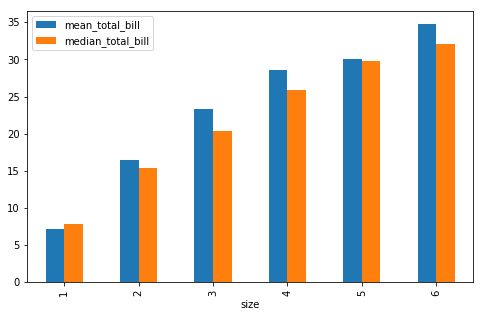

In [54]:
c.plot(kind="bar",figsize=(8,5))

In [55]:
# with wide format data pandas plots are easy to make
# with long format data seaborn plots are easy to make

In [56]:
# Convert wide data into long data
c

,mean_total_bill,median_total_bill
size,,
1,7.242500,7.915
2,16.448013,15.370
3,23.277632,20.365
4,28.613514,25.890
5,30.068000,29.850
6,34.830000,32.050


In [57]:
c_melt = c.reset_index().melt(id_vars="size",var_name="Metric")
c_melt

,size,Metric,value
0,1,mean_total_bill,7.242500
1,2,mean_total_bill,16.448013
2,3,mean_total_bill,23.277632
3,4,mean_total_bill,28.613514
4,5,mean_total_bill,30.068000
5,6,mean_total_bill,34.830000
6,1,median_total_bill,7.915000
7,2,median_total_bill,15.370000
8,3,median_total_bill,20.365000
9,4,median_total_bill,25.890000


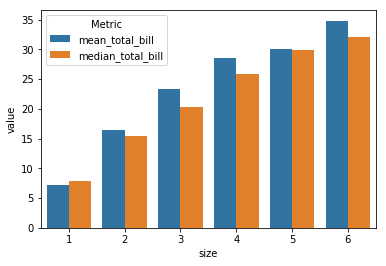

In [58]:
# 3) using seaborn
sns.barplot(x="size",y="value",data=c_melt,hue="Metric")

## Pie Charts

In [59]:
agg2

,sum_total_bill
sex,
Male,3256.82
Female,1570.95


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000236D29525F8>],
      dtype=object)

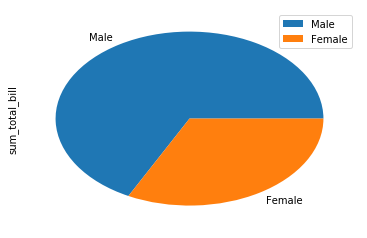

In [60]:
# 1) using pandas
agg2.plot(kind="pie",subplots=True)

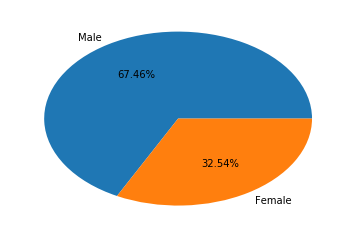

In [61]:
#2) using pyplot
plt.pie(x="sum_total_bill",labels="sex",data=agg2.reset_index(),autopct="%.2f%%")
plt.show()

In [62]:
# 3) using seaborn


In [63]:
agg3a_piv

smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


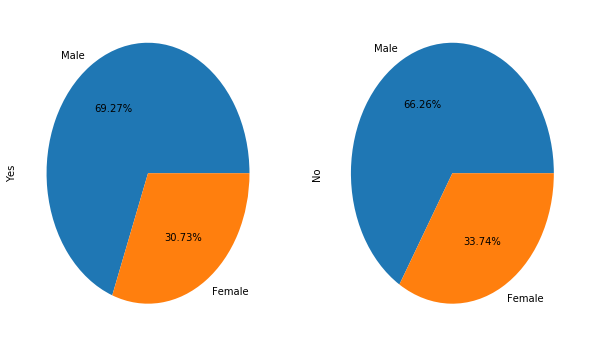

In [64]:
agg3a_piv.plot(kind="pie",subplots=True,legend=False,figsize=(10,6),autopct = "%.2f%%")
plt.show()

In [65]:
# 1) if you are having data in your index pandas plot work best
# 2) if data is in column use seaborn or pyplot
# 3) Wide data - pandas
# 4) Long data - seaborn/python